# import and variable

In [52]:
%pip install tensorflow tf2onnx matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import tf2onnx
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
import json
import os

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

In [4]:
dataset_dir = './dataset'
model_name = 'image_classifier.keras'

# Train

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # MobileNetV2 input size
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

Found 55 images belonging to 10 classes.


In [8]:
base_model = MobileNetV2(weights='imagenet', include_top=False)

/var/folders/w3/12vhw4l144v3jqftz9jdh2cc0000gn/T/ipykernel_54643/3358278115.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


In [9]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [10]:
model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.6931
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.3750 - loss: 2.4804
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - accuracy: 0.7500 - loss: 1.0681
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.8261 - loss: 0.7689
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.8696 - loss: 0.4499
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.9375 - loss: 0.2672
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 1.0000 - loss: 0.0520
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9688 - loss: 0.1517
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 1.0000 - loss: 0.0885
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 1.0000 - loss: 0.0253


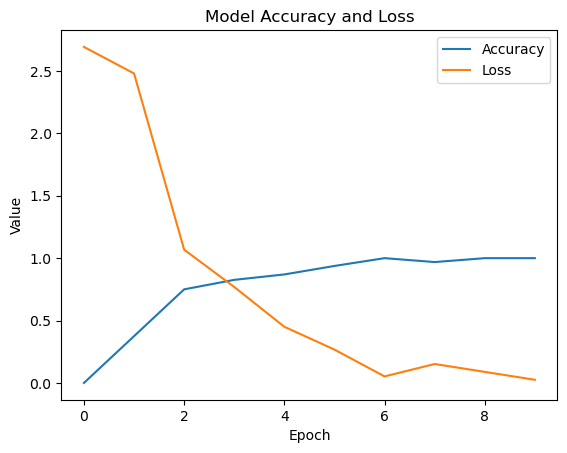

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(['Accuracy', 'Loss'])
plt.show()

# save model

In [15]:
def get_classes():
    return sorted([
        name for name in os.listdir(dataset_dir)
        if os.path.isdir(os.path.join(dataset_dir, name))
    ])

In [16]:
model.save(model_name)

with open("classes.json", "w") as f:
    json.dump(get_classes(), f)

# Predict

In [18]:
class_names = get_classes()  # e.g. ['jeans', 'shirt', 't-shirt']
model = tf.keras.models.load_model(model_name)

# Load and preprocess image
img_path = "test/3.webp"  # Path to your test image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 224, 224, 3)

# Make prediction
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions[0])
predicted_label = class_names[predicted_index]

print(f"Prediction: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
Prediction: jeans
